In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-eda/zomato.csv


In [2]:
df=pd.read_csv('/kaggle/input/zomato-eda/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.isnull().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
# Deleting redundant columns.
del df['listed_in(city)']
del df['url']
del df['menu_item']
del df['address']

In [9]:
h=df['rest_type'].value_counts()
h

rest_type
Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: count, Length: 93, dtype: int64

In [10]:
df=df.rename(columns={'name':'Name','online_order':'Online order','book_table':'Book Table','phone':'Phone No'})
df.head()

,Name,Online order,Book Table,rate,votes,Phone No,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [11]:
df=df.drop_duplicates()
df.head()

,Name,Online order,Book Table,rate,votes,Phone No,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [12]:
# Cleaning individual columns.
df['rate']=df['rate'].str.replace('/','')

df['rate']=df['rate'].replace(r'[^0-9.]',np.nan,regex=True)
# df['rate'].unique()

df['Phone No']=df['Phone No'].str.replace(r'[^0-9+]',"",regex= True) 
# df['Phone No']
df.head()

,Name,Online order,Book Table,rate,votes,Phone No,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.15,775,08042297555+919743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.15,787,08041714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.85,918,+919663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.75,88,+919620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.85,166,+918026612447+919901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [13]:
# change data type of column.
df['rate']=df['rate'].astype('float')
df.dtypes

Name                            object
Online order                    object
Book Table                      object
rate                           float64
votes                            int64
Phone No                        object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
listed_in(type)                 object
dtype: object

In [14]:
#Remove the NaN values from the dataset
df=df.dropna()
df.head()

,Name,Online order,Book Table,rate,votes,Phone No,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type)
0,Jalsa,Yes,Yes,4.15,775,08042297555+919743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,Spice Elephant,Yes,No,4.15,787,08041714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,San Churro Cafe,Yes,No,3.85,918,+919663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,Addhuri Udupi Bhojana,No,No,3.75,88,+919620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,Grand Village,No,No,3.85,166,+918026612447+919901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


<Axes: xlabel='Online order', ylabel='count'>

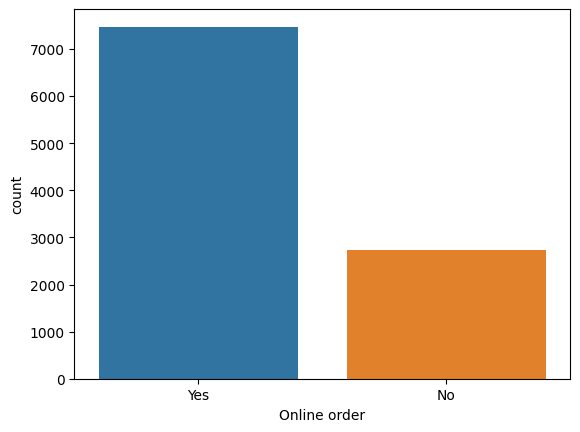

In [15]:
# Restaurants delivering Online or not

sns.countplot(x='Online order',data=df)


<Axes: xlabel='Book Table', ylabel='count'>

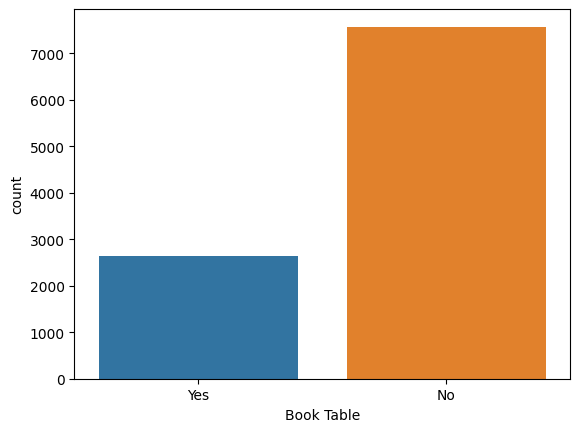

In [16]:
# Restaurants allowing table booking or not
sns.countplot(x='Book Table',data=df)

<Axes: xlabel='Book Table', ylabel='rate'>

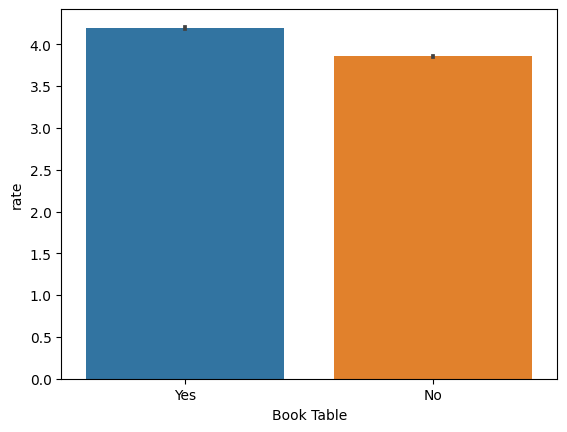

In [17]:

df['rate']=df['rate'].astype('float')
df['rate']
df.dtypes

sns.barplot(x='Book Table',y='rate',data=df)

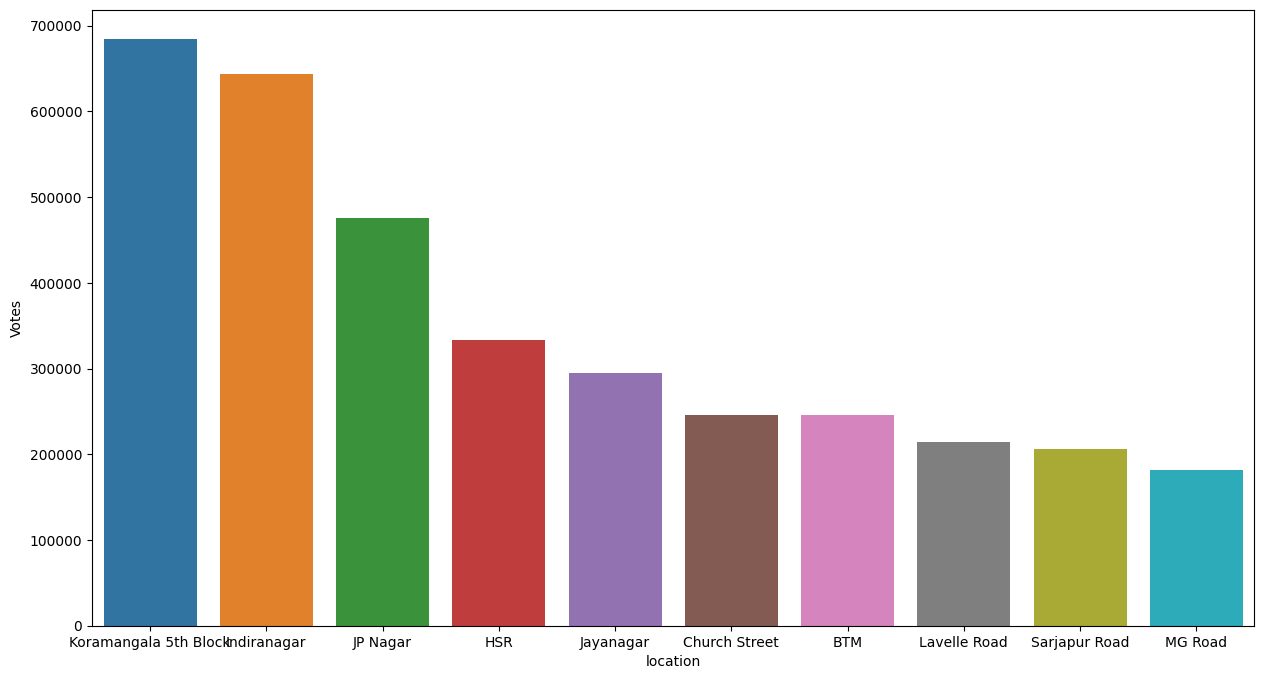

In [18]:
# Best Location
import matplotlib.pyplot as plt
l=df.groupby('location')['votes'].sum().sort_values(ascending=False)
l=l.head(10)
plt.figure(figsize=(15, 8))

sns.barplot(x=l.index,y=l.values)
plt.ylabel('Votes')
plt.show()

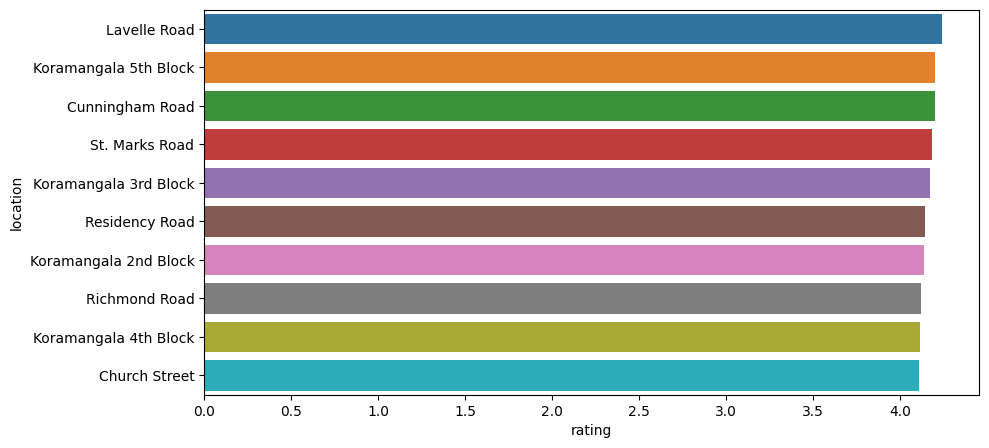

In [19]:
# Relation between Location and Rating

l=df.groupby('location')['rate'].mean().sort_values(ascending=False)
l=l.head(10)
plt.figure(figsize=(10, 5))

sns.barplot(y=l.index,x=l.values,orient='h')
plt.xlabel('rating')
plt.show()

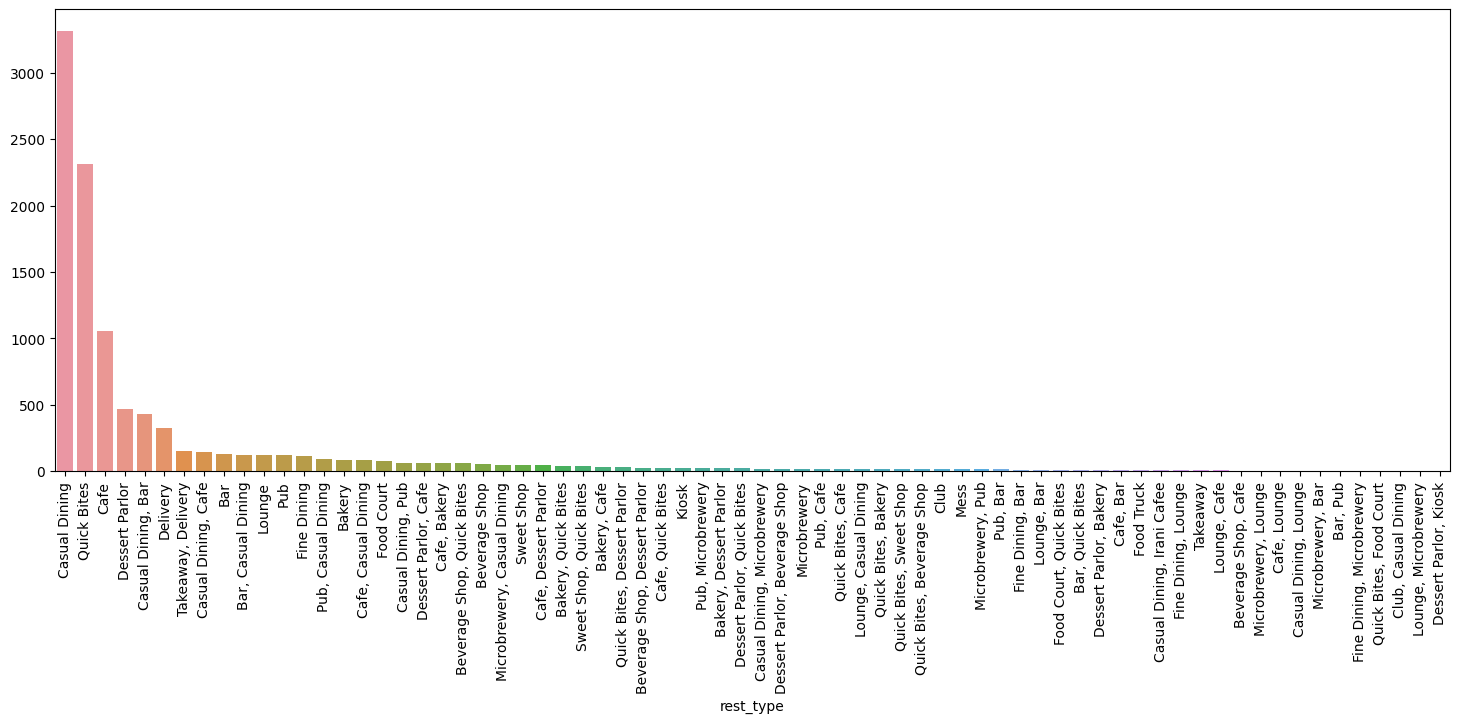

In [20]:
# Restaurant Type
h=df['rest_type'].value_counts()

plt.figure(figsize=(18,6))
sns.barplot(x=h.index,y=h.values)
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


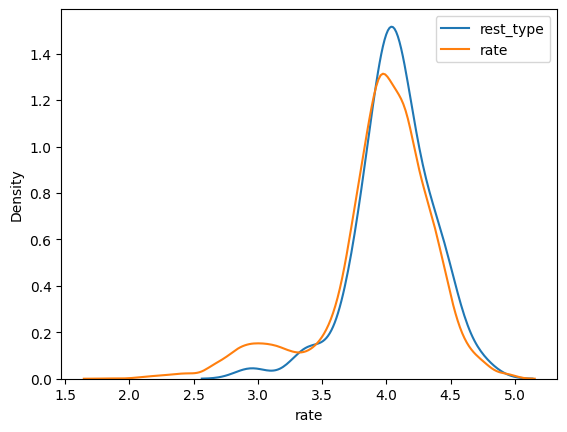

In [21]:
# Gaussian Rest type and Rating
# Gaussian means Kde plot.
k=df.groupby('rest_type')['rate'].mean().sort_values(ascending=False)
sns.kdeplot(k.values)
sns.kdeplot(df['rate'])

plt.legend(['rest_type','rate'])

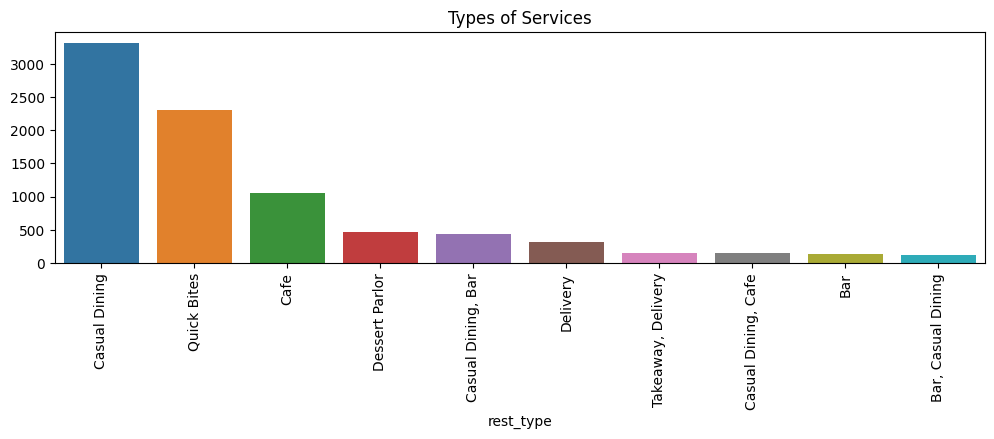

In [22]:
# Types of Services

s=df['rest_type'].value_counts().head(10)
# sns.barplot(x='')
plt.figure(figsize=(12,3))
sns.barplot(x= s.index,y=s.values,data=df)
plt.title('Types of Services')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Relation between Type and Rating')

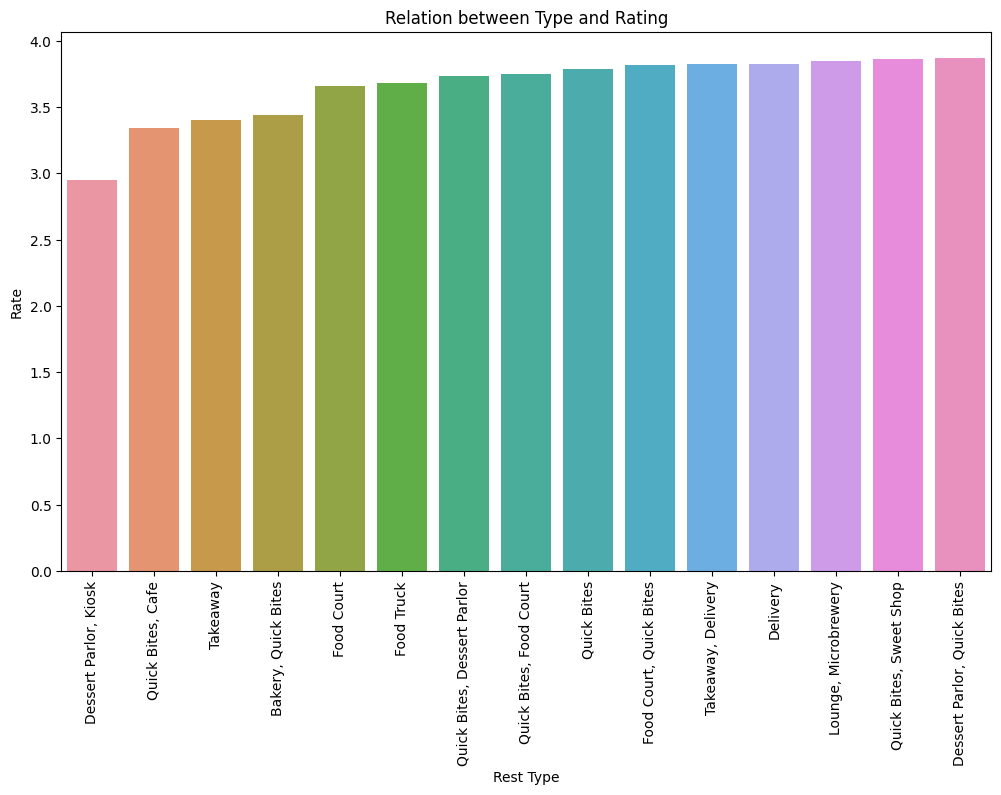

In [23]:
# Relation between Type and Rating

k=df.groupby('rest_type')['rate'].mean().sort_values(ascending=True).head(15)
plt.figure(figsize=(12,7))
sns.barplot(x=k.index,y=k.values)
plt.xticks(rotation=90)
plt.ylabel('Rate')
plt.xlabel('Rest Type')
plt.title("Relation between Type and Rating")


In [24]:
# Cost of Restaurant
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(r'\,','', regex = True)

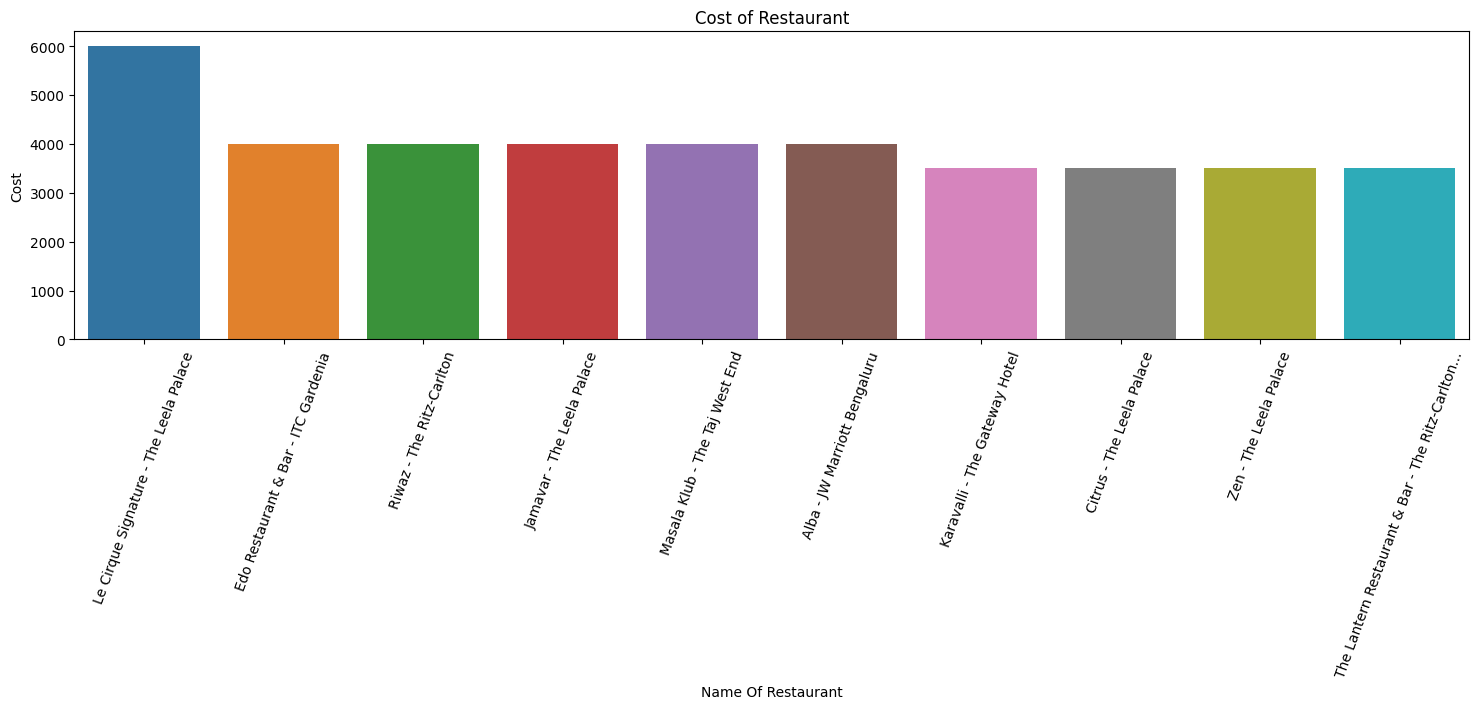

In [25]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float')
a=df.groupby('Name')['approx_cost(for two people)'].mean().sort_values(ascending=False)
a=a.head(10)
plt.figure(figsize=(18,4))
sns.barplot(x= a.index , y = a.values)
plt.xlabel('Name Of Restaurant')
plt.ylabel('Cost')
plt.title('Cost of Restaurant')
plt.xticks(rotation=70)
plt.show()

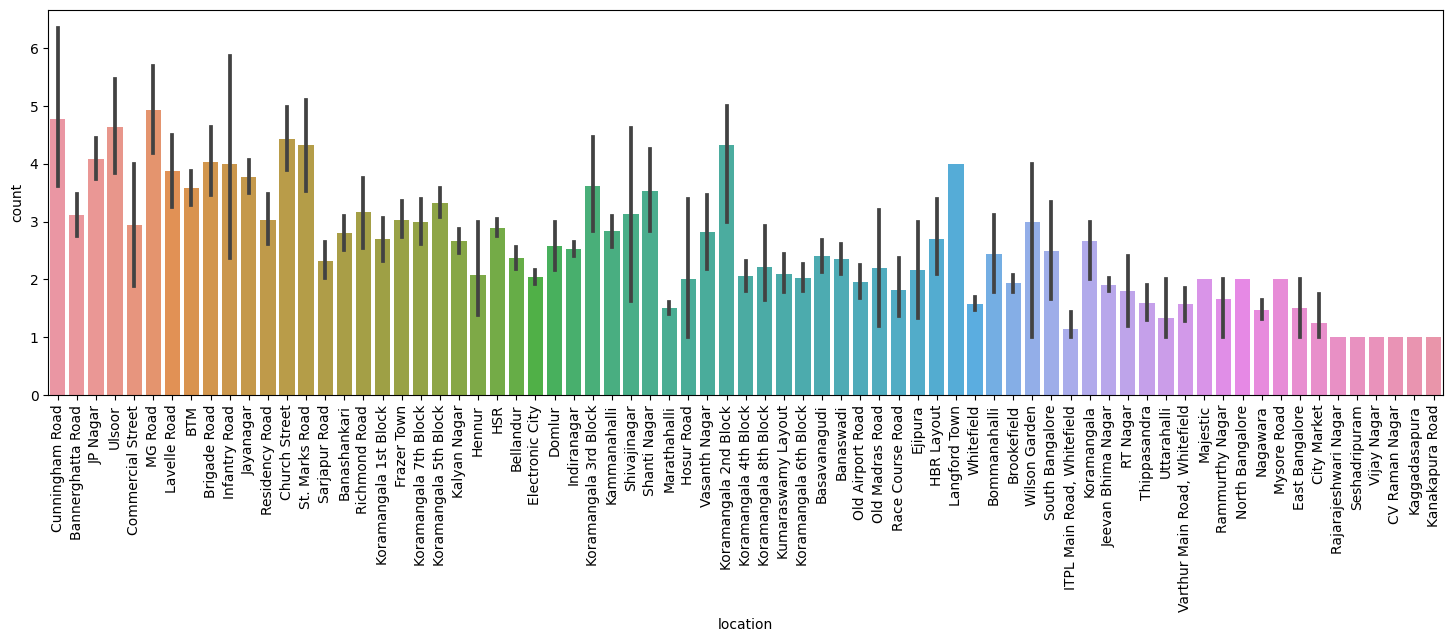

In [26]:
# No. of restaurants in a Location
a1 = df.groupby('location')['Name'].value_counts().reset_index().sort_values(by = 'count', ascending=False)

plt.figure(figsize=(18,5))
sns.barplot(x = 'location', y = 'count',data=a1)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='location', ylabel='count'>

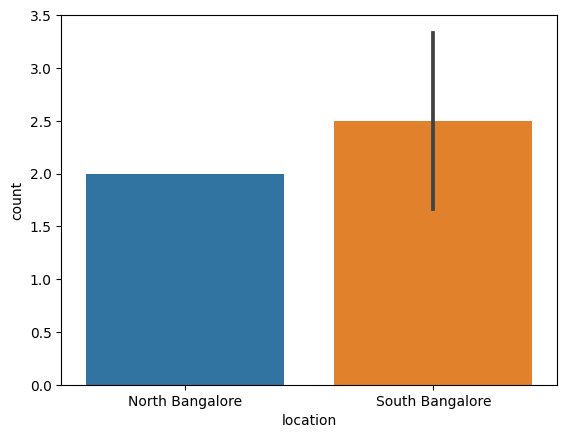

In [27]:
# Most famous restaurant chains in Bengaluru

s=df.groupby('Name')['location'].value_counts().reset_index().sort_values(by= "count" ,ascending=False)
s1=pd.concat([s[(s['location']=='North Bangalore')], s[s['location']=='South Bangalore']])
s1.sort_values(by= 'count' ,ascending = False)
sns.barplot(x='location', y='count',data=s1)
# s1